In [17]:
pip install emoji

   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   -- ------------------------------------ 30.7/590.6 kB 660.6 kB/s eta 0:00:01
   --------------- ------------------------ 235.5/590.6 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------  583.7/590.6 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------  583.7/590.6 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------  583.7/590.6 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------  583.7/590.6 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------  583.7/590.6 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------  583.7/590.6 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------  583.7/590.6 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------  583.7/590.6 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 590.6/590.6 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use u

In [28]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr
import datetime
from collections import Counter
import itertools
plt.rcParams['font.family'] = 'Segoe UI Emoji'  # Windows
# plt.rcParams['font.family'] = 'Apple Color Emoji'  # macOS
# plt.rcParams['font.family'] = 'Noto Color Emoji'  # Linux


<Axes: ylabel='pizza_name'>

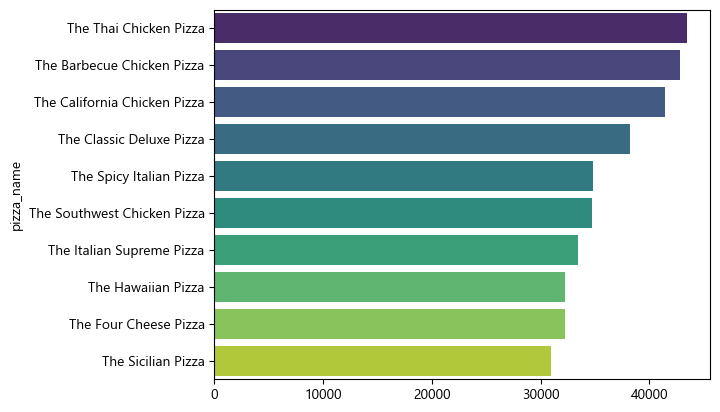

In [38]:
palette = sns.color_palette("viridis", n_colors=len(top_pizzas))  # Smooth gradient
sns.barplot(y=top_pizzas.index, x=top_pizzas.values, hue=top_pizzas.index, palette=palette, legend=False)


In [20]:
df = pd.read_csv("C:/Users/stewa/Downloads/pizza_sales.csv", delimiter = ',')
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [21]:
# Convert date columns
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.time  # Extract time only
df['order_hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour  # Extract hour
df['order_day'] = df['order_date'].dt.day_name()  # Get day of the week
df['order_month'] = df['order_date'].dt.month_name()  # Get month name

In [22]:
# Convert numeric columns
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')
df['total_price'] = pd.to_numeric(df['total_price'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')


In [23]:
# Compute additional metrics
df['computed_total'] = df['unit_price'] * df['quantity']
df['computed_total']

0        13.25
1        16.00
2        18.50
3        20.75
4        16.00
         ...  
48615    16.75
48616    17.95
48617    12.00
48618    20.25
48619    12.75
Name: computed_total, Length: 48620, dtype: float64

In [24]:
# Ensure total price consistency
if not (df['computed_total'] == df['total_price']).all():
    print("\n⚠ Warning: Some total prices do not match unit_price * quantity!")

In [25]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [26]:
# Check missing values
print("\n🔍 Missing Values After Cleaning:\n", df.isnull().sum())



🔍 Missing Values After Cleaning:
 pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
order_hour           0
order_day            0
order_month          0
computed_total       0
dtype: int64


### 1️⃣ Time-Based Sales Insights
## 🔹 Peak Order Hours

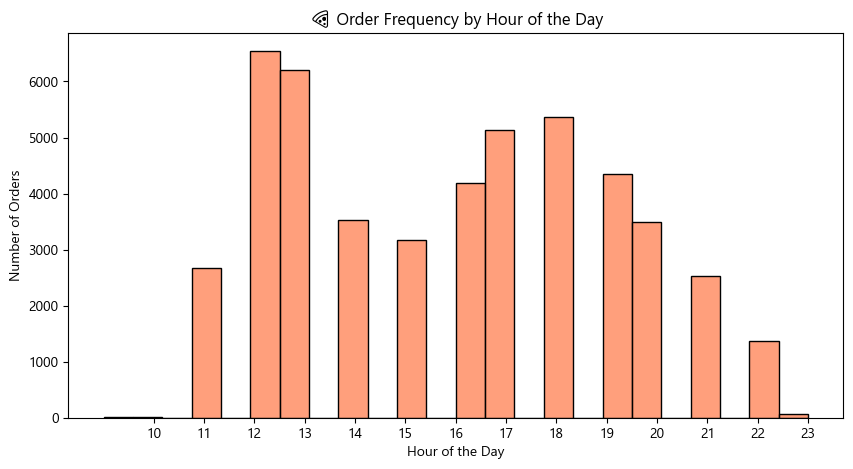

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(df['order_hour'], bins=24, kde=False, color='coral')
plt.title("🍕 Order Frequency by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.xticks(range(10, 24))
plt.show()
#✅ Insight: This reveals when most orders are placed. Is there a lunch peak (12-2 PM) or dinner peak (6-9 PM)?

### 2️⃣ Pizza Popularity & Revenue Contribution
## 🔹 Top 10 Best-Selling Pizzas

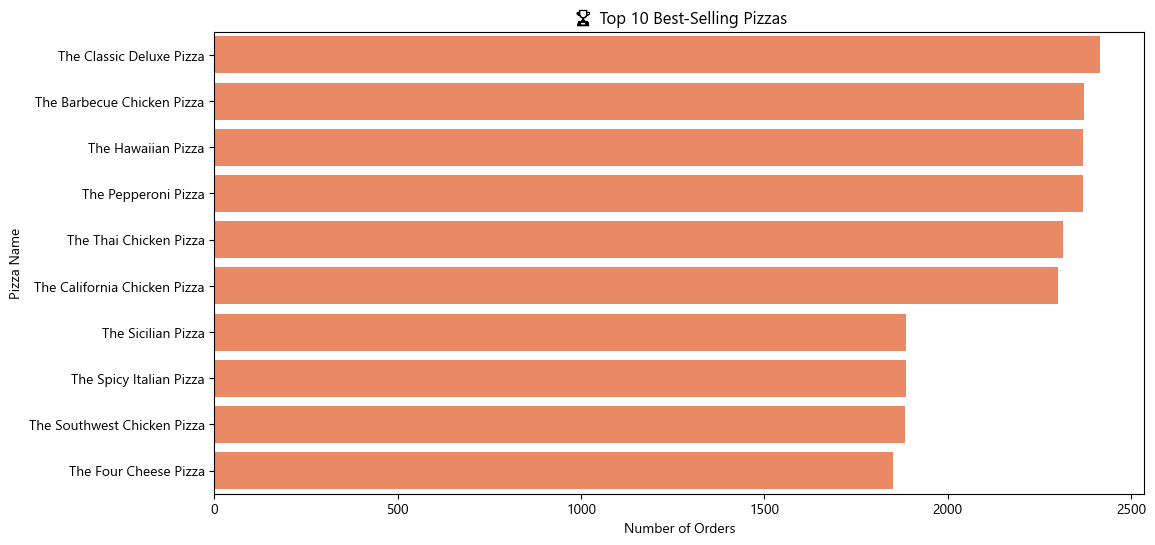

In [31]:
popular_pizzas = df['pizza_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=popular_pizzas.index, x=popular_pizzas.values, color='coral')
plt.title("🏆 Top 10 Best-Selling Pizzas")
plt.xlabel("Number of Orders")
plt.ylabel("Pizza Name")
plt.show()



### 🔹 Revenue Contribution by Category

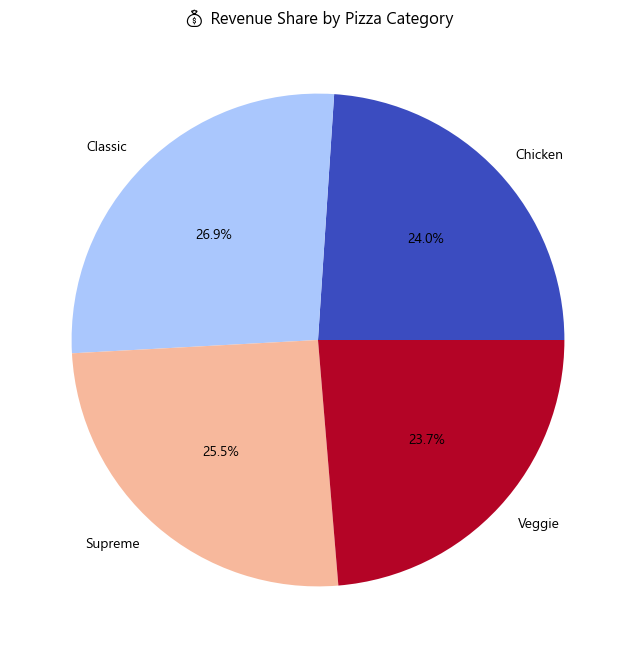

In [39]:
category_sales = df.groupby('pizza_category')['total_price'].sum()
plt.figure(figsize=(8, 5))
category_sales.plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm', figsize=(8, 8))
plt.title("💰 Revenue Share by Pizza Category")
plt.ylabel("")
plt.show()
# Insight: Which category (Classic, Veggie, Chicken, Supreme) generates the most revenue?

C:\Users\stewa\AppData\Local\Temp\ipykernel_8124\1061388327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_pizzas.index, x=top_pizzas.values, palette='Accent')


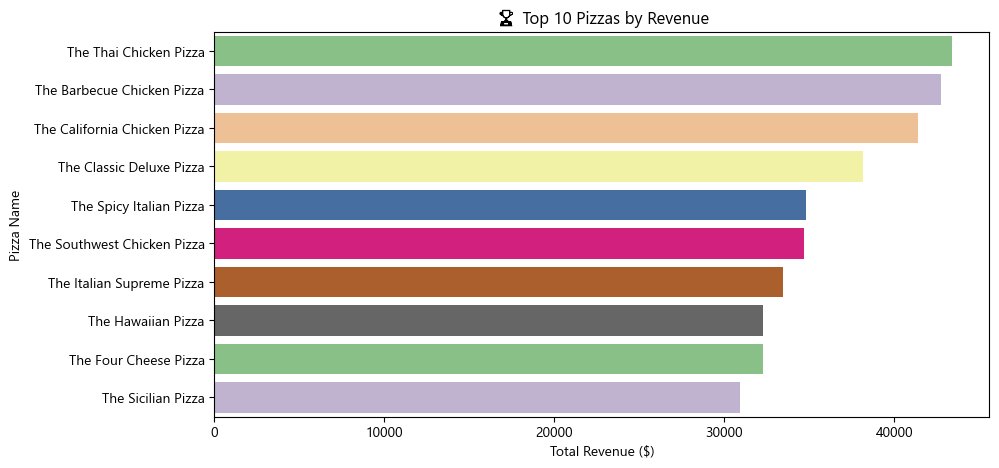

In [37]:
top_pizzas = df.groupby('pizza_name')['total_price'].sum().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_pizzas.index, x=top_pizzas.values, palette='Accent')
plt.title("🏆 Top 10 Pizzas by Revenue")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Pizza Name")
plt.show()


## 3️⃣ Customer Order Behavior
# 🔹 Average Order Value

In [41]:
avg_order_value = df.groupby('order_id')['total_price'].sum().mean()
print(f"\n💰 Average Order Value: ${avg_order_value:.2f}")



💰 Average Order Value: $38.31


C:\Users\stewa\AppData\Local\Temp\ipykernel_8124\3828761885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pizza_size', data=df, palette='Accent')


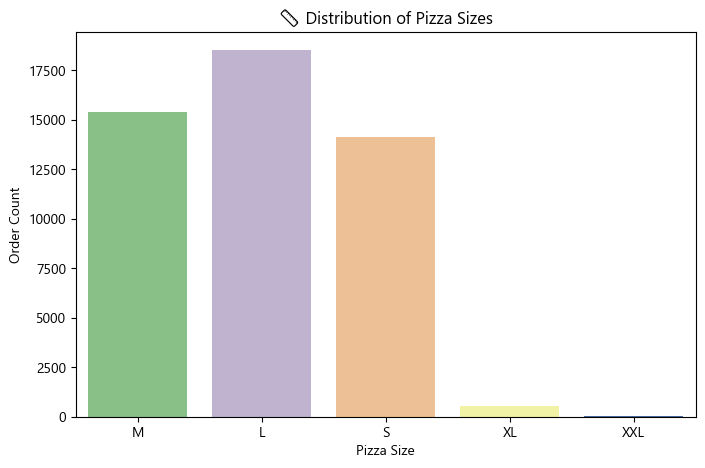

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(x='pizza_size', data=df, palette='Accent')
plt.title("📏 Distribution of Pizza Sizes")
plt.xlabel("Pizza Size")
plt.ylabel("Order Count")
plt.show()


### 5️⃣ Price Elasticity & Revenue Optimization
🔹 Does Higher Price Reduce Sales?

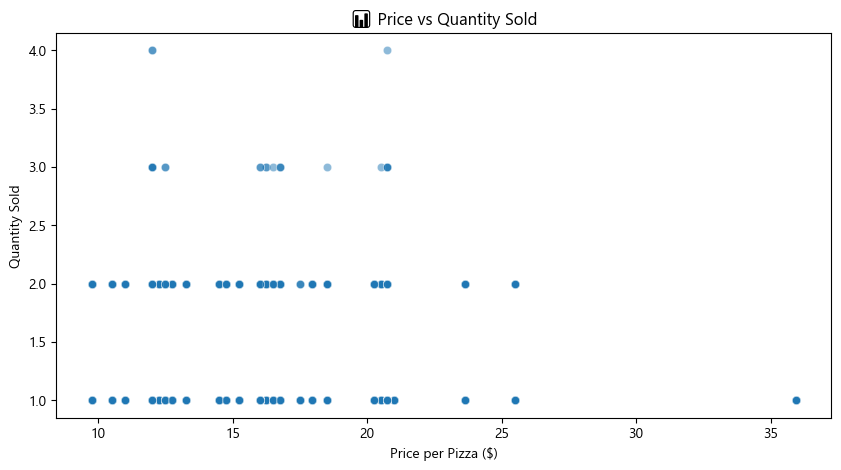

In [45]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='unit_price', y='quantity', data=df, alpha=0.5)
plt.title("📊 Price vs Quantity Sold")
plt.xlabel("Price per Pizza ($)")
plt.ylabel("Quantity Sold")
plt.show()


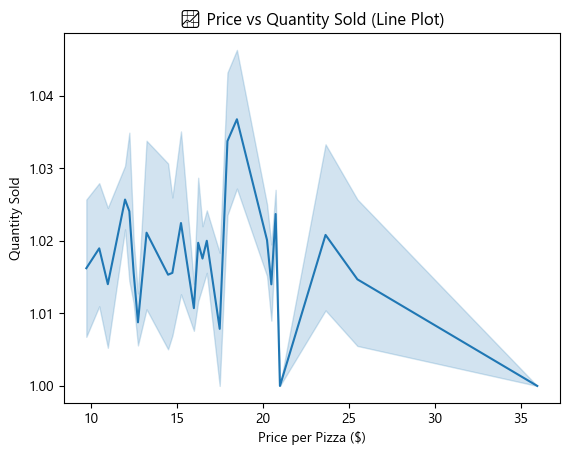

In [49]:
sns.lineplot(x='unit_price', y='quantity', data=df)
plt.title("📈 Price vs Quantity Sold (Line Plot)")
plt.xlabel("Price per Pizza ($)")
plt.ylabel("Quantity Sold")
plt.show()


C:\Users\stewa\AppData\Local\Temp\ipykernel_8124\2244502985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pizza_category', y='unit_price', data=df, palette='Set3')


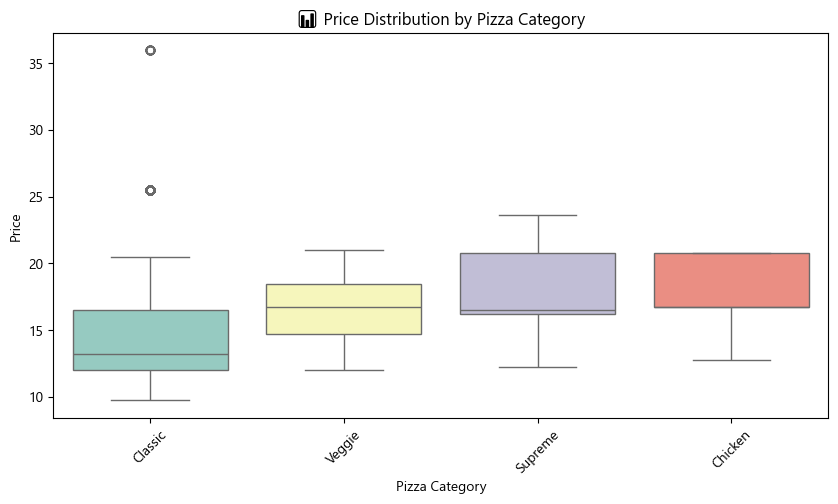

In [51]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='pizza_category', y='unit_price', data=df, palette='Set3')
plt.title("📊 Price Distribution by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


## 6️⃣ Statistical Analysis
🔹 ANOVA: Do Pizza Sizes Have Different Average Prices?

In [52]:
small = df[df['pizza_size'] == 'S']['unit_price']
medium = df[df['pizza_size'] == 'M']['unit_price']
large = df[df['pizza_size'] == 'L']['unit_price']

f_stat, p_value = f_oneway(small, medium, large)
print(f"\n📊 ANOVA Test for Pizza Size Pricing: F-stat = {f_stat:.2f}, p-value = {p_value:.3f}")



📊 ANOVA Test for Pizza Size Pricing: F-stat = 79916.97, p-value = 0.000


In [53]:
# Save the DataFrame to a CSV file
df.to_csv('pizza_sales.csv', index=False)
